In [1]:
from IPython.display import display
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, SimpleRNN, LSTM, GRU

import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

import plotly
import plotly.graph_objects as go
from pyod.models.knn import KNN

In [5]:
df = pd.read_csv('C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/Max_Anomaly_AllData_GT1.csv')
display(df)

,Name,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,anomaly
0,2014/8/1 0:0:0,2998.1,199.2,28.2,430.8,232.6,55207.0,40.0,583.2,39.3,35.5,35.5,251.8,1.80,44.0,46.8,1
1,2014/8/1 0:1:0,2997.4,199.0,28.2,430.8,233.5,55266.3,40.1,583.1,39.4,35.2,35.5,251.6,1.81,44.1,46.6,1
2,2014/8/1 0:2:0,2999.6,200.2,28.2,430.8,229.9,55448.3,40.1,583.1,39.3,35.5,35.6,251.6,1.81,43.9,47.3,1
3,2014/8/1 0:3:0,2997.4,200.8,28.2,430.8,233.5,55535.7,40.1,583.2,39.6,35.5,35.5,251.4,1.80,44.0,47.2,0
4,2014/8/1 0:4:0,2996.6,203.1,28.2,430.8,232.6,56230.8,40.0,583.4,39.5,35.4,35.3,251.0,1.80,44.0,47.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2015/2/21 23:55:0,3000.0,180.5,28.0,419.7,231.8,49512.5,40.6,555.1,24.6,33.3,26.6,237.6,1.81,44.0,24.3,0
129596,2015/2/21 23:56:0,2998.5,180.5,28.1,419.9,231.9,49591.3,40.6,555.3,24.7,33.2,26.1,237.5,1.81,44.0,24.2,0
129597,2015/2/21 23:57:0,3001.5,180.3,28.1,420.0,235.2,49371.0,40.6,555.1,24.7,33.4,26.2,237.5,1.81,44.0,24.2,0
129598,2015/2/21 23:58:0,3001.1,180.3,28.1,420.0,232.0,49467.3,40.6,555.1,24.6,33.8,26.5,237.5,1.81,43.9,24.4,0


In [6]:
from numpy import unique

from keras.layers import Dropout
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.optimizers import gradient_descent_v2, rmsprop_v2, adam_v2

verbose, epochs, batch_size = 1, 128, 32
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
accuracy_prediction = 0
iter = 80

while accuracy_prediction < iter :
  
  TargetVariable=['anomaly']
  Predictors=['GT SPEED', 'ACTLD','COMP INLET AIR TEMP', 'COMP OUTLET AIR TEMP', 'EXHAUST GAS DUCT PRESS','GT FUEL GAS FLOW (AFTER CORRECT)', 'FUEL GAS SUPPLY PRESS','EXHAUST GAS AVG TEMP(EXT)', 'No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X)', 'No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'ROTOR COOLING AIR TEMP AVE.', 'LUBE OIL SUPPLY PRESS', 'LUBE OIL TEMP', 'INLET AIR FILTER DIFF PRESS']

  X=df[Predictors].values
  y=df[TargetVariable].values

  scaler_x = RobustScaler()
  input_scaler = scaler_x.fit(X)
  X = input_scaler.transform(X)

  X = X.reshape(X.shape[0], X.shape[1], 1)
  
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


  model = Sequential()
  model.add(Conv1D(10, 2, activation="relu", input_shape=(X_train.shape[1],X_train.shape[2])))
  model.add(Dense(32, activation="relu"))
  model.add(MaxPooling1D())
  #model.add(Flatten())
  model.add(Flatten())
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(4, activation="relu"))
  model.add(Dense(y_train.shape[1], activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
  # fit network
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

  Predictions=model.predict(X_test)

  
  y_test_orig= y_test
  X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1])

  X_test1 = scaler_x.inverse_transform(X_test1)

  Test_Data=X_test1
  TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
  TestingData['anomaly']=y_test_orig
  TestingData['Predicted anomaly']=Predictions

  #TestingData['Predicted anomaly'].mask(abs(TestingData['Predicted anomaly']) <= np.mean(abs(TestingData['Predicted anomaly'])), 0, inplace=True)
  #TestingData['Predicted anomaly'].mask(abs(TestingData['Predicted anomaly']) > np.mean(abs(TestingData['Predicted anomaly'])), 1, inplace=True)
  TestingData['Predicted anomaly'].mask((TestingData['Predicted anomaly']) <= 0.5, 0, inplace=True)
  TestingData['Predicted anomaly'].mask((TestingData['Predicted anomaly']) > 0.5, 1, inplace=True)

  predicted_value_1 = TestingData[(TestingData['anomaly'] == 1) & (TestingData['Predicted anomaly'] == 0)]

  predicted_value_2 = TestingData[(TestingData['anomaly'] == 0) & (TestingData['Predicted anomaly'] == 1)]
  accuracy_prediction = ((TestingData.shape[0]-predicted_value_1.shape[0]-predicted_value_2.shape[0])/TestingData.shape[0])*100
  print('Accuracy Data : ', accuracy_prediction)

  if(accuracy_prediction >iter) :
    break

print('Final Accuracy Data : ', accuracy_prediction)

Epoch 1/128
3645/3645 [==============================] - 9s 2ms/step - loss: 0.6017 - accuracy: 0.8835
Epoch 2/128
3645/3645 [==============================] - 8s 2ms/step - loss: 0.4943 - accuracy: 0.9032
Epoch 3/128
3645/3645 [==============================] - 8s 2ms/step - loss: 0.4189 - accuracy: 0.9053
Epoch 4/128
3645/3645 [==============================] - 8s 2ms/step - loss: 0.3621 - accuracy: 0.9064
Epoch 5/128
3645/3645 [==============================] - 8s 2ms/step - loss: 0.3201 - accuracy: 0.9083
Epoch 6/128
3645/3645 [==============================] - 9s 2ms/step - loss: 0.2895 - accuracy: 0.9092
Epoch 7/128
3645/3645 [==============================] - 9s 2ms/step - loss: 0.2674 - accuracy: 0.9099
Epoch 8/128
3645/3645 [==============================] - 9s 3ms/step - loss: 0.2513 - accuracy: 0.9105
Epoch 9/128
3645/3645 [==============================] - 9s 2ms/step - loss: 0.2393 - accuracy: 0.9107
Epoch 10/128
3645/3645 [==============================] - 8s 2ms/step - l

In [7]:
hist_df = pd.DataFrame(history.history) 


#save CSV
hist_csv_file = 'C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/history_cnn_01.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [8]:
history_cnn = pd.read_csv('C:/Users/P5CD1/OneDrive/Documents/GitHub/DataScience_Discuss/DS_test/history_cnn_01.csv')
display(history_cnn)

,Unnamed: 0,loss,accuracy
0,0,0.601676,0.883539
1,1,0.494284,0.903198
2,2,0.418946,0.905290
3,3,0.362085,0.906396
4,4,0.320094,0.908342
...,...,...,...
123,123,0.169874,0.923620
124,124,0.169525,0.924323
125,125,0.169511,0.924331
126,126,0.169070,0.924589


dict_keys(['loss', 'accuracy'])


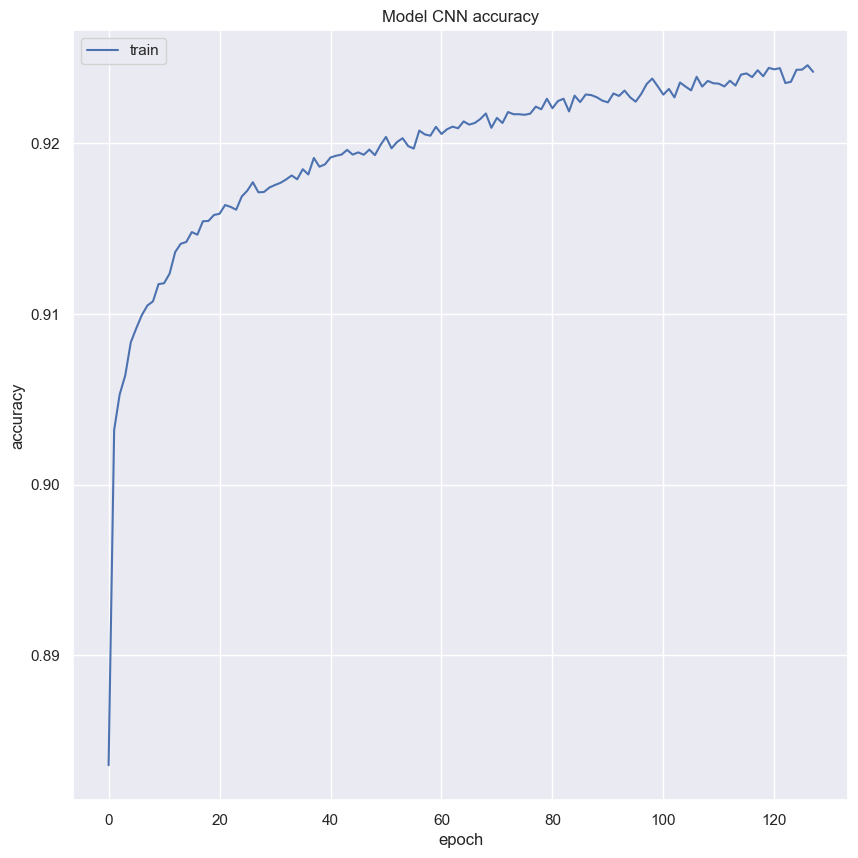

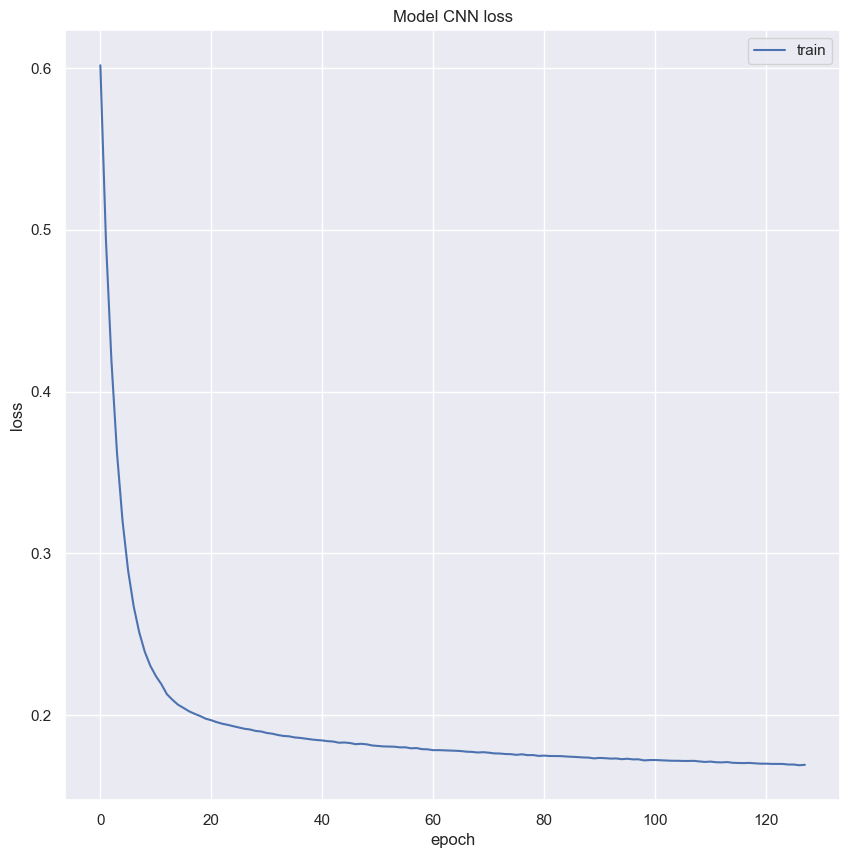

In [9]:
print(history.history.keys())

plt.rcParams['figure.figsize'] = [10, 10]
#  "Accuracy"
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print('\n')
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [10]:
TargetVariable=['anomaly']
Predictors=['GT SPEED', 'ACTLD','COMP INLET AIR TEMP', 'COMP OUTLET AIR TEMP', 'EXHAUST GAS DUCT PRESS','GT FUEL GAS FLOW (AFTER CORRECT)', 'FUEL GAS SUPPLY PRESS','EXHAUST GAS AVG TEMP(EXT)', 'No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X)', 'No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X)', 'ROTOR COOLING AIR TEMP AVE.', 'LUBE OIL SUPPLY PRESS', 'LUBE OIL TEMP', 'INLET AIR FILTER DIFF PRESS']

X=df[Predictors].values
y=df[TargetVariable].values

scaler_x = RobustScaler()
input_scaler = scaler_x.fit(X)
X = input_scaler.transform(X)

X = X.reshape(X.shape[0], X.shape[1], 1)
  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Predictions=model.predict(X_test)
 

#Predictions=TargetVarScalerFit.inverse_transform(Predictions)

y_test_orig= y_test

X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1])
X_test1 = scaler_x.inverse_transform(X_test1)

Test_Data=X_test1
#Predictions = abs(Predictions)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['anomaly']=y_test_orig
TestingData['Predicted anomaly']=Predictions
#display(TestingData)

#TestingData['Predicted anomaly'] = np.where(TestingData['Predicted anomaly']<0.5, 0,1)
#TestingData['Predicted anomaly'].mask(abs(TestingData['Predicted anomaly']) <= np.mean(abs(TestingData['Predicted anomaly'])), 0, inplace=True)
#TestingData['Predicted anomaly'].mask(abs(TestingData['Predicted anomaly']) > np.mean(abs(TestingData['Predicted anomaly'])), 1, inplace=True)
TestingData['Predicted anomaly'].mask((TestingData['Predicted anomaly']) < 0.5, 0, inplace=True)
TestingData['Predicted anomaly'].mask((TestingData['Predicted anomaly']) > 0.5, 1, inplace=True)
#TestingData.head()

#predicted_value_1= TestingData.iloc[TestingData['anomaly'] == 1]

predicted_value_1 = TestingData[(TestingData['anomaly'] == 1) & (TestingData['Predicted anomaly'] == 0)]
display(predicted_value_1)
predicted_value_2 = TestingData[(TestingData['anomaly'] == 0) & (TestingData['Predicted anomaly'] == 1)]
display(predicted_value_2)
print('Accuracy Data : ', ((TestingData.shape[0]-predicted_value_1.shape[0]-predicted_value_2.shape[0])/TestingData.shape[0])*100)

405/405 [==============================] - 1s 1ms/step


,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,anomaly,Predicted anomaly
7,2993.3,119.5,26.5,388.2,168.9,37887.3,40.8,537.3,42.9,40.8,31.5,205.8,1.80,44.0,38.5,1,0.0
16,3006.4,224.8,30.2,451.7,267.5,60426.4,39.9,608.6,38.4,31.8,45.9,228.2,1.81,43.9,57.5,1,0.0
29,2995.5,223.2,30.5,450.5,265.8,59969.7,39.9,609.0,38.5,29.9,40.0,226.4,1.81,43.9,53.0,1,0.0
56,3003.0,124.9,27.2,392.4,175.0,38581.9,40.7,543.7,41.8,39.3,34.0,209.3,1.80,44.0,40.0,1,0.0
138,2997.0,124.7,27.6,392.2,170.8,38608.8,40.7,541.9,41.8,37.7,33.0,209.8,1.80,44.0,36.2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12812,2998.5,203.6,30.4,436.1,226.2,55051.8,40.1,586.9,39.5,31.5,39.9,257.2,1.80,43.9,46.6,1,0.0
12861,3001.9,229.1,28.7,448.4,273.6,62115.0,39.8,608.8,38.7,33.5,35.8,225.6,1.81,44.0,51.5,1,0.0
12907,2993.6,119.9,26.6,388.6,168.9,38231.8,40.8,537.7,42.7,40.1,31.1,205.7,1.80,44.0,38.3,1,0.0
12923,2997.8,231.2,27.9,446.5,275.9,62932.2,39.9,609.2,38.9,33.9,35.5,223.6,1.81,43.9,52.7,1,0.0


,GT SPEED,ACTLD,COMP INLET AIR TEMP,COMP OUTLET AIR TEMP,EXHAUST GAS DUCT PRESS,GT FUEL GAS FLOW (AFTER CORRECT),FUEL GAS SUPPLY PRESS,EXHAUST GAS AVG TEMP(EXT),No.1 BEARING ROTOR VIBRATION (TURB.SIDE) (X),No.2 BEARING ROTOR VIBRATION (COMP.SIDE) (X),No.3 BEARING ROTOR VIBRATION (TURB.SIDE) (X),ROTOR COOLING AIR TEMP AVE.,LUBE OIL SUPPLY PRESS,LUBE OIL TEMP,INLET AIR FILTER DIFF PRESS,anomaly,Predicted anomaly
12,3016.9,125.2,26.6,393.4,175.1,39448.1,40.8,543.4,42.1,39.4,34.4,209.3,1.81,44.0,42.9,0,1.0
15,2995.1,196.0,28.3,428.4,228.7,54477.5,40.1,581.5,39.0,35.5,34.0,248.1,1.80,43.9,46.3,0,1.0
23,2995.5,125.2,31.2,399.6,169.8,39130.5,40.7,553.3,40.2,36.6,33.5,217.4,1.80,44.1,42.0,0,1.0
28,2998.9,225.1,29.8,450.7,269.8,61578.0,39.8,609.1,40.5,37.1,46.3,228.2,1.80,44.0,58.4,0,1.0
31,3000.0,150.4,27.4,403.3,178.6,44005.4,40.5,567.9,41.2,38.9,34.4,217.6,1.80,44.0,42.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12722,2998.5,181.5,28.3,421.2,222.9,50848.5,40.3,576.2,38.9,32.2,37.9,239.9,1.80,44.1,51.9,0,1.0
12731,3010.1,230.7,27.8,448.1,276.6,62842.0,40.3,608.9,37.5,31.6,38.8,225.2,1.81,44.0,60.0,0,1.0
12856,3004.5,236.8,25.1,444.8,285.4,62970.2,39.8,606.3,38.7,32.1,40.4,262.5,1.80,44.0,70.9,0,1.0
12883,3002.6,180.8,29.0,422.1,222.6,50512.8,40.4,578.3,38.8,31.9,37.2,241.4,1.81,44.0,49.3,0,1.0


Accuracy Data :  92.12962962962963


In [11]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

#cm = confusion_matrix(y_test, pred_y)
cm = confusion_matrix(TestingData['anomaly'], TestingData['Predicted anomaly'])
print(cm)
cm

405/405 [==============================] - 1s 2ms/step
[[9549  529]
 [ 491 2391]]


array([[9549,  529],
       [ 491, 2391]], dtype=int64)

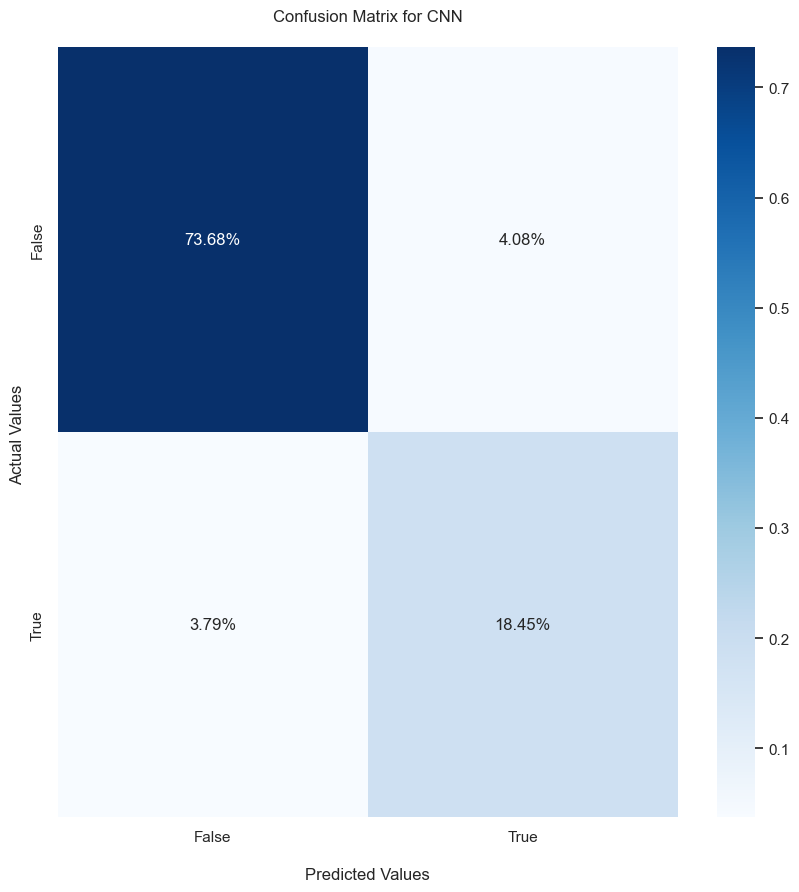

In [12]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for CNN\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

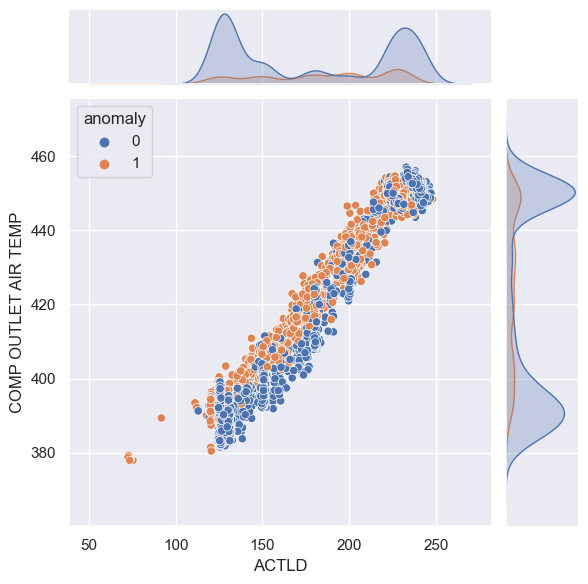

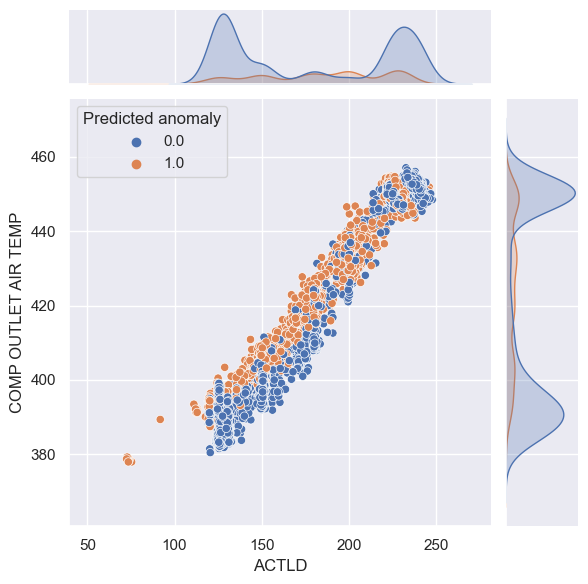

In [13]:
import seaborn as sns
sns.jointplot(data=TestingData, x="ACTLD", y="COMP OUTLET AIR TEMP", hue="anomaly")
sns.jointplot(data=TestingData, x="ACTLD", y="COMP OUTLET AIR TEMP", hue="Predicted anomaly")